### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.metrics.distance  import edit_distance
from sklearn.feature_extraction.text import TfidfVectorizer 
import seaborn as sns
import re
from sklearn.model_selection import train_test_split as tts
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Importing Dataset

In [2]:
data = pd.read_csv(r"Movie_Review_Dataset.csv")
data.head()

,Review,Sentiment
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you ' ve got mail works alot better than it de...,pos
3,""" jaws "" is a rare film that grabs your attent...",pos
4,moviemaking is a lot like being the general ma...,pos


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     2000 non-null   object
 1   Sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


From above it can be deduced that there are no null values

In [4]:
data.describe()

,Review,Sentiment
count,2000,2000
unique,2000,2
top,originally entitled dancing about architecture...,pos
freq,1,1000


## Pre-Processing Data

In [5]:
#Creating function to remove noise from data
def remove_noise(text):
    text = text.lower()
    text = re.sub("<[^>]*>","",text)
    text = re.sub("[+-=/!@#$%\^&_\.?*,:;'\"\]\\\[{}()]","",text)
    return text

data.Review = data.Review.apply(remove_noise)

In [6]:
#Creating function to Stem words 
def Stem(text):
    text = text.lower()
    PS = PorterStemmer()
    text = " ".join([PS.stem(word) for word in text.split()])
    return text

data.Review = data.Review.apply(Stem)

In [7]:
#Creating function to remove stop words
def remove_stop_words(text):
    stop_words_list = stopwords.words('english')
    tokens = word_tokenize(text)
    filtered_word = [token for token in tokens if token not in stop_words_list or len(token)>2]
    return " ".join(filtered_word)

data.Review = data.Review.apply(remove_stop_words)


## Data Visualization

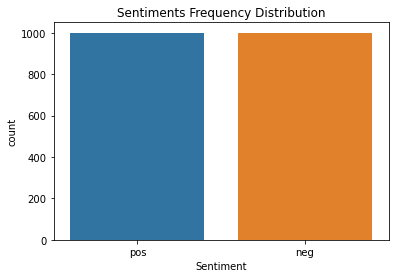

In [8]:
#Countplot of Positive and Negative Sentiments
sns.countplot(x = 'Sentiment', data = data)
plt.title("Sentiments Frequency Distribution")
plt.show()

From the above plot it is clearly visible that there is equal frequency of both labels.

In [9]:
# Using wordcloud checking the high frequency words

pos_text = " ".join(review for review in data.Review[data.Sentiment == "pos"])
neg_text = " ".join(review for review in data.Review[data.Sentiment == "neg"])
 
wordcloud1 = WordCloud(max_font_size=80, max_words=100, stopwords=stopwords.words("english")).generate(pos_text)
wordcloud2 = WordCloud(max_font_size=80, max_words=100, stopwords=stopwords.words("english")).generate(neg_text)

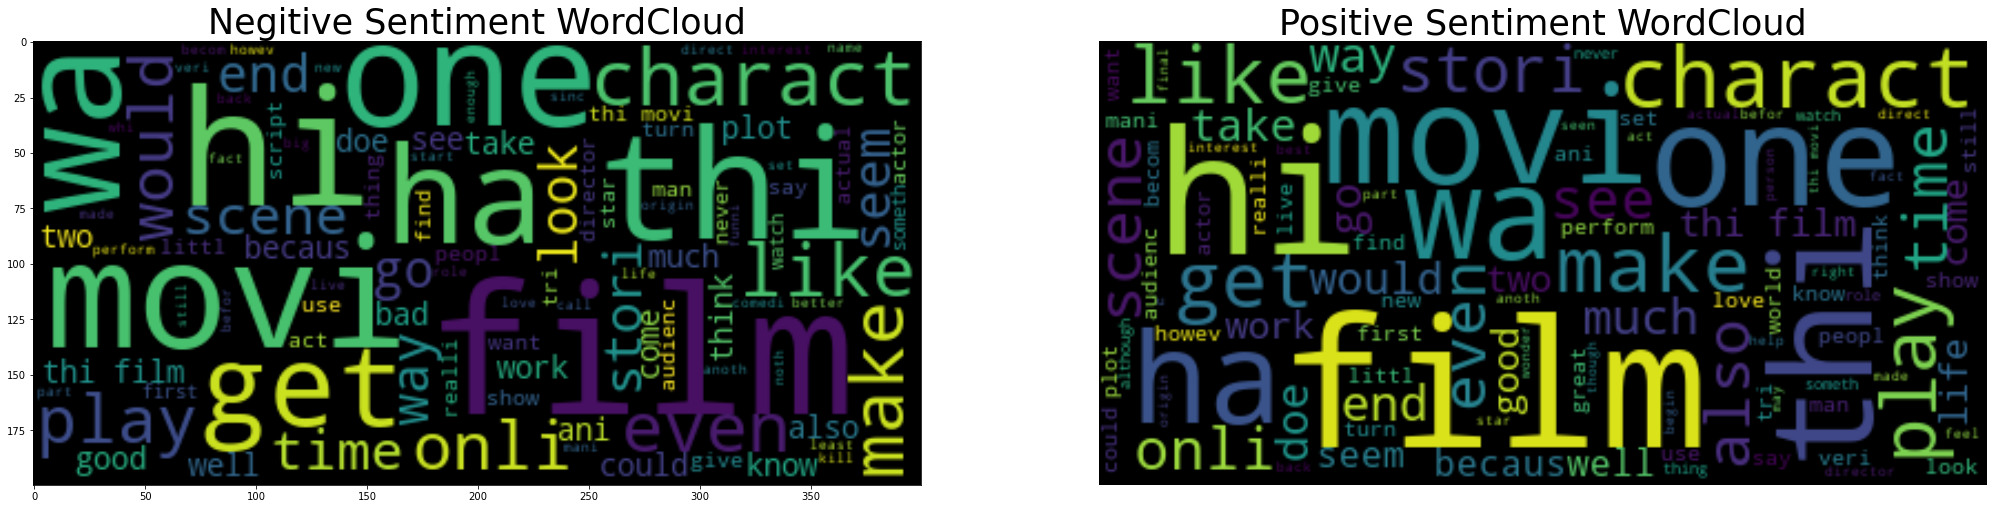

In [10]:
# High Frequency words before removing the common words

plt.figure(figsize = (35,15))
plt.subplot(1,2,1)
plt.title("Negitive Sentiment WordCloud", fontdict={'fontsize':35, 'fontweight': 50})
plt.imshow(wordcloud2, interpolation="bilinear")
plt.subplot(1,2,2)
plt.title("Positive Sentiment WordCloud", fontdict={'fontsize':35, 'fontweight': 50})
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show();

The above wordclouds does not rellay much information about the dataset that can be used to distinct the two sentiments, Let's try to form WordCloud for each label containing only distinct words.

In [11]:
# Removing the Common Words 
pos_tokens = set(word_tokenize(pos_text))
neg_tokens = set(word_tokenize(neg_text))

pos_text_with_processing = " ".join(tokens for tokens in pos_tokens-neg_tokens)
neg_text_with_processing = " ".join(tokens for tokens in neg_tokens-pos_tokens)
 
wordcloud1 = WordCloud(max_font_size=80, stopwords=stopwords.words("english")).generate(pos_text_with_processing)
wordcloud2 = WordCloud(max_font_size=80, stopwords=stopwords.words("english")).generate(neg_text_with_processing)

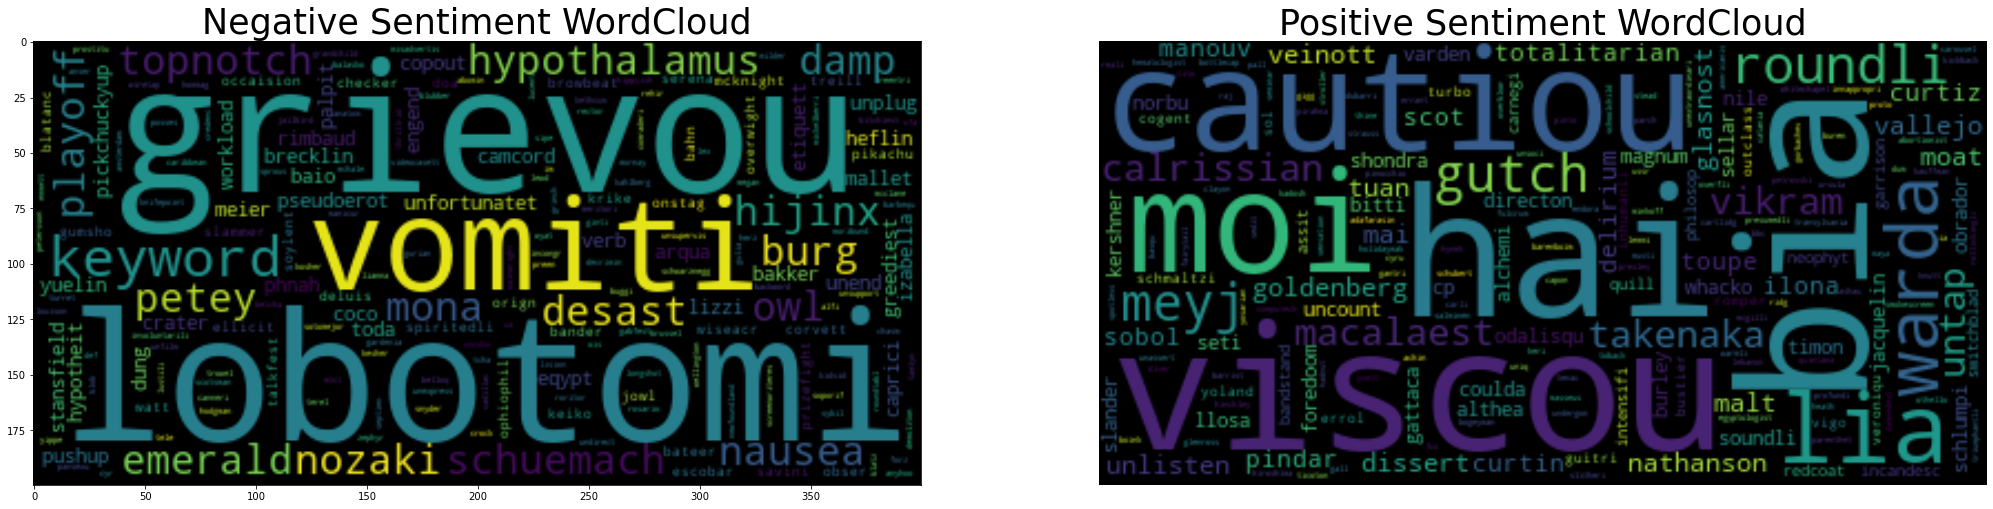

In [12]:
# High Frequency words after removing the common words
plt.figure(figsize = (35,15))
plt.subplot(1,2,1)
plt.title("Negative Sentiment WordCloud", fontdict={'fontsize':35, 'fontweight': 50})
plt.imshow(wordcloud2, interpolation="bilinear")
plt.subplot(1,2,2)
plt.title("Positive Sentiment WordCloud", fontdict={'fontsize':35, 'fontweight': 50})
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show();

In [13]:
#Defining a function to plot word frequency
def plot_word_frequency(words, title, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.title(title)
    plot = sns.barplot(labels, counts)
    return plot

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Word Frequency of Negative Reviews'}>

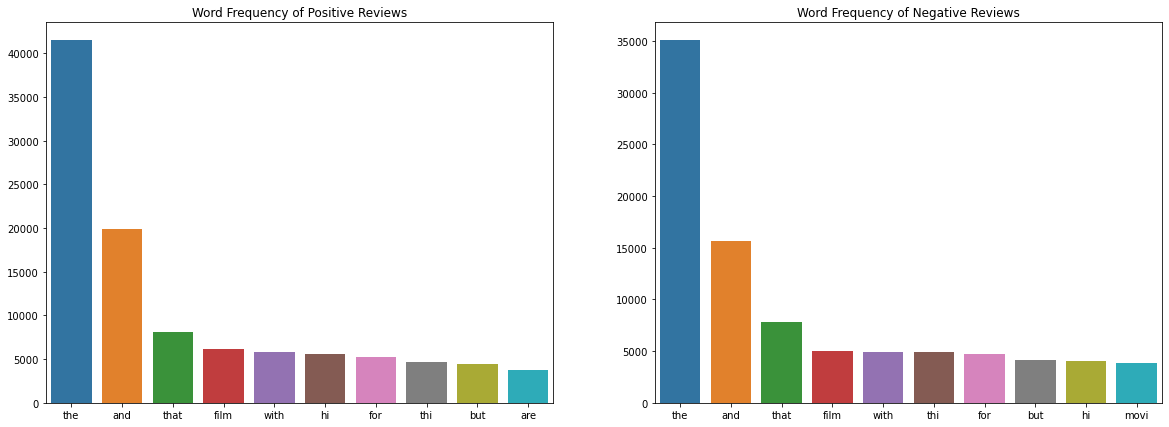

In [14]:
# Creating a list of positive and negative words 
pos_words = [word for text in data.Review[data.Sentiment == "pos"] for word in word_tokenize(text)]
neg_words = [word for text in data.Review[data.Sentiment == "neg"] for word in word_tokenize(text)]

# Ploting frequency of top 10 words in positive and negative reviews
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
plot_word_frequency(pos_words, "Word Frequency of Positive Reviews")
plt.subplot(1,2,2)
plot_word_frequency(neg_words, "Word Frequency of Negative Reviews")


It can be seen that both negative and positive reviews have same frequent words nothing much can be deduced from above plot

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='Length'>

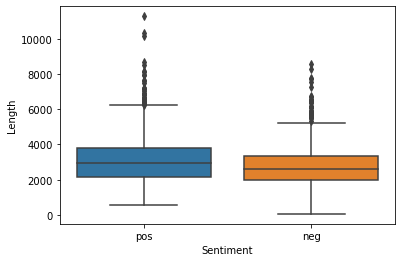

In [15]:
#ploting box plot of of length of review
data['Length'] = data.Review.apply(lambda x: len(x))
sns.boxplot(data.Sentiment, data.Length)

From above plot it can be seen that average review length is slightly higher for positive than of negative

### TF-IDF Vectorization

Term Frequency-Inverse Document Frequency model (TFIDF)
It is used to convert text documents to matrix of tfidf features.

In [16]:
tf_vect=TfidfVectorizer()
tf_vect_reviews=tf_vect.fit_transform(data.Review)
print(tf_vect_reviews)

  (0, 4455)	0.03798778659158295
  (0, 6314)	0.03276339323180603
  (0, 12375)	0.03549360734182908
  (0, 19782)	0.030050189223688493
  (0, 9063)	0.03787801342218802
  (0, 10388)	0.01915599885681874
  (0, 1395)	0.017611325608557295
  (0, 9536)	0.023819014152493344
  (0, 168)	0.01901898904857198
  (0, 11256)	0.04709396916807698
  (0, 1183)	0.022650250282744845
  (0, 10685)	0.028224525763293134
  (0, 14639)	0.03327373532033825
  (0, 9972)	0.028542602547496507
  (0, 15655)	0.020901499816131066
  (0, 19885)	0.0157076562768033
  (0, 4811)	0.04679701877496121
  (0, 2008)	0.01916981453545854
  (0, 18749)	0.018138553470910587
  (0, 21730)	0.02518811690217275
  (0, 9195)	0.018426871299997743
  (0, 12951)	0.05906402214471621
  (0, 5093)	0.05704319496179094
  (0, 18552)	0.049114796351002264
  (0, 19586)	0.030521971704389778
  :	:
  (1999, 12885)	0.015977127052290017
  (1999, 14076)	0.02681856866849587
  (1999, 25040)	0.04229671678345432
  (1999, 19265)	0.017254094179722033
  (1999, 19720)	0.02546264

In [17]:
#Creating a dataframe of TF-IDF model
pd.DataFrame(tf_vect_reviews.toarray(), columns = tf_vect.get_feature_names()).head()

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhh,aah,aaliyah,aalyah,aamir,...,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Splitting the dataset 
train_X,test_X,train_y,test_y = tts(tf_vect_reviews,data.Sentiment, random_state = 0)

## Model Creation and Performance

In [19]:
# Creating Multinomial Naive Bayes Model
MNB_model = MultinomialNB()
MNB_model.fit(train_X,train_y)  
MNB_y_pred = MNB_model.predict(test_X)

# Creating Bernoulli Naive Bayes Model
BNB_model = BernoulliNB()
BNB_model.fit(train_X,train_y)
BNB_y_pred = BNB_model.predict(test_X)

#Creating Logistic Regression Model
LR_model=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
LR_model.fit(train_X,train_y)
LR_y_pred= LR_model.predict(test_X)

# Checking Accuracy of the models
print(f"Accuracy of Multinomial Naive Bayes Model: \n{accuracy_score(test_y, MNB_y_pred)}")
print(f"Accuracy of Bernoulli Naive Bayes Model: \n{accuracy_score(test_y, BNB_y_pred)}")
print(f"Accuracy of Logistic Regression Model: \n{accuracy_score(test_y, LR_y_pred)}")

# Classification Report
print("Mutinomial Naive Bayes model: \n",classification_report(test_y,MNB_y_pred))
print("Bernoulli Naive Bayes model: \n",classification_report(test_y, BNB_y_pred))
print("Logistic Regression model: \n",classification_report(test_y, LR_y_pred))

Accuracy of Multinomial Naive Bayes Model: 
0.812
Accuracy of Bernoulli Naive Bayes Model: 
0.768
Accuracy of Logistic Regression Model: 
0.84
Mutinomial Naive Bayes model: 
               precision    recall  f1-score   support

         neg       0.77      0.87      0.82       246
         pos       0.86      0.75      0.80       254

    accuracy                           0.81       500
   macro avg       0.82      0.81      0.81       500
weighted avg       0.82      0.81      0.81       500

Bernoulli Naive Bayes model: 
               precision    recall  f1-score   support

         neg       0.72      0.85      0.78       246
         pos       0.83      0.69      0.75       254

    accuracy                           0.77       500
   macro avg       0.78      0.77      0.77       500
weighted avg       0.78      0.77      0.77       500

Logistic Regression model: 
               precision    recall  f1-score   support

         neg       0.84      0.83      0.84       246
  

Text(0.5, 1.0, 'Logistic Regression model')

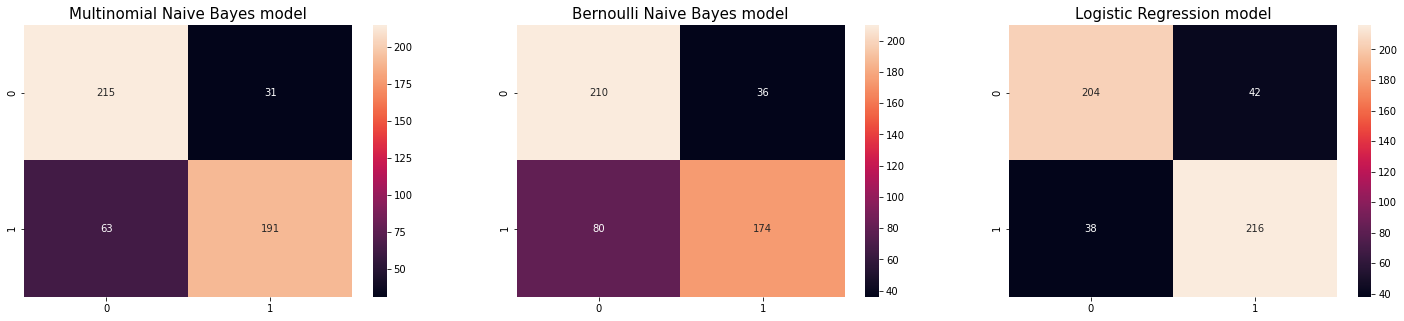

In [20]:
#Ploting Confusion Matrix
matrix1 = confusion_matrix(test_y,MNB_y_pred)
matrix2 = confusion_matrix(test_y,BNB_y_pred)
matrix3 = confusion_matrix(test_y,LR_y_pred)
plt.figure(figsize = (25,5))
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(test_y,MNB_y_pred),annot=True,fmt="g")
plt.title("Multinomial Naive Bayes model",fontdict={"fontsize":15})
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(test_y,BNB_y_pred),annot=True,fmt="g")
plt.title("Bernoulli Naive Bayes model",fontdict={"fontsize":15})
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(test_y,LR_y_pred),annot=True,fmt="g")
plt.title("Logistic Regression model",fontdict={"fontsize":15})

## Conclusion: 
We can observed that all three logistic regression, bernoulli naive bayes and multinomial naive bayes models are performing well but in comparison Logistic Regression model works better among them.<br>
Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.